In [1]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("肺炎数据.csv")
data = data.drop(["城市","新增出院","新增死亡","消息来源","来源链接1","来源链接2","来源链接3","备注"],axis=1)
data.to_csv(path_or_buf="肺炎清洗数据.csv",index=False)

In [2]:
data = pd.read_csv("肺炎清洗数据.csv")
data = data.fillna(0)
data

,时间,地区,新增确诊
0,2020/1/22,安徽,0.0
1,2020/1/22,安徽,1.0
2,2020/1/23,安徽,1.0
3,2020/1/23,安徽,1.0
4,2020/1/23,安徽,1.0
...,...,...,...
16881,2020/11/10,重庆,0.0
16882,2020/11/17,重庆,0.0
16883,2020/11/19,重庆,1.0
16884,2020/12/17,重庆,0.0


In [3]:
import datetime

for i in range(len(data)):
    data['时间'][i] = datetime.datetime.strptime(data['时间'][i], "%Y/%m/%d")
data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,时间,地区,新增确诊
0,2020-01-22 00:00:00,安徽,0.0
1,2020-01-22 00:00:00,安徽,1.0
2,2020-01-23 00:00:00,安徽,1.0
3,2020-01-23 00:00:00,安徽,1.0
4,2020-01-23 00:00:00,安徽,1.0
...,...,...,...
16881,2020-11-10 00:00:00,重庆,0.0
16882,2020-11-17 00:00:00,重庆,0.0
16883,2020-11-19 00:00:00,重庆,1.0
16884,2020-12-17 00:00:00,重庆,0.0


In [4]:

date_data = pd.pivot_table(data,index=['时间'],values=['新增确诊'],aggfunc='count')
print(date_data)

            新增确诊
时间              
2020-01-11     1
2020-01-12     1
2020-01-13     1
2020-01-16     1
2020-01-18     1
...          ...
2021-01-24    34
2021-01-25    29
2021-01-26    31
2021-01-27    32
2021-01-28    31

[381 rows x 1 columns]


In [5]:
date_data.index

DatetimeIndex(['2020-01-11', '2020-01-12', '2020-01-13', '2020-01-16',
               '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21',
               '2020-01-22', '2020-01-23',
               ...
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26',
               '2021-01-27', '2021-01-28'],
              dtype='datetime64[ns]', name='时间', length=381, freq=None)

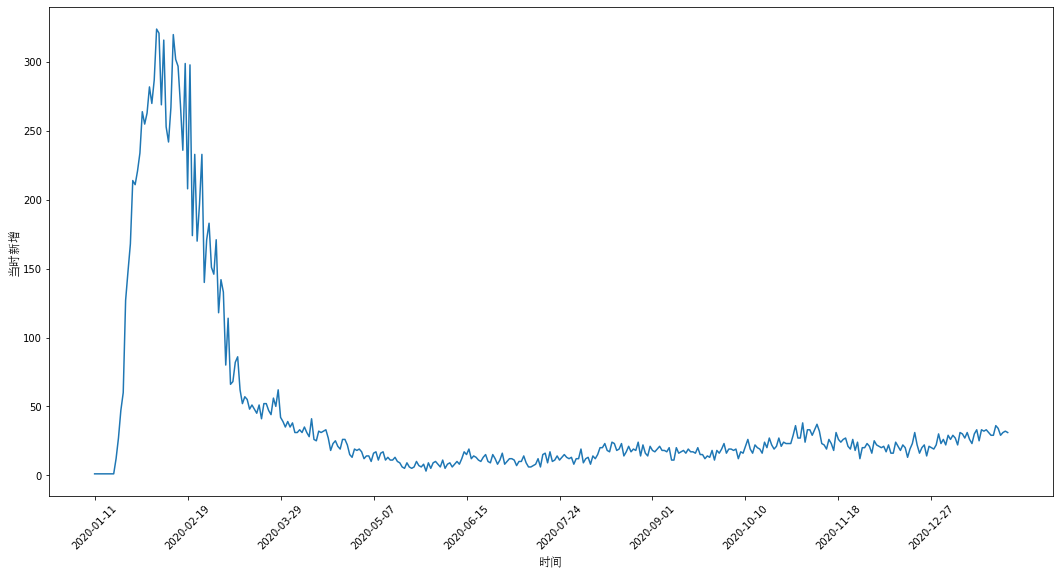

In [14]:
#生成全国新增病例时间图
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties 


font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)#设置中文格式
fig = plt.figure(figsize=(18,9))
#生成axis对象
ax = fig.add_subplot(111) #本案例的figure中只包含一个图表

#设置x轴为时间格式
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(date_data.index[0],date_data.index[-1],freq='D'),rotation=45)

ax.plot(date_data.index,date_data['新增确诊'])

plt.xlabel("时间",fontproperties=font_set)#x轴上的名字
plt.ylabel("当时新增",fontproperties=font_set)
plt.locator_params(axis='x', nbins=10)
plt.show()

In [16]:
#生成全国舆论情感图

motion = pd.read_csv("最终数据（副本）.csv")
for i in range(len(motion)):
    motion['时间'][i] = datetime.datetime.strptime(motion['时间'][i], "%Y/%m/%d")
    motion['消极数据'][i] = -motion['消极数据'][i]
motion['情感指数'] = motion['积极数据']+motion['消极数据']
motion['点赞数'] = motion['点赞数']+1
motion['情感得分'] = motion['情感指数']*motion['点赞数']
motion

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,人名,点赞数,时间,评论,地区,积极数据,消极数据,情感指数,情感得分
0,是吴珉珉呀,124,2020-12-31 00:00:00,辽宁疫情快结束吧！2021好运来！,北京,0.740446,-0.259554,0.480892,59.630630
1,尼奇窝窝,42,2020-12-31 00:00:00,做好个人防护，中国这种做法不可能大面积传染开,上海,0.122701,-0.877299,-0.754598,-31.693103
2,尼奇窝窝,12,2020-12-03 00:00:00,保护好自己，不给国家添乱,上海,0.602974,-0.397026,0.205948,2.471382
3,尼奇窝窝,10,2020-11-30 00:00:00,医护人员辛苦了,上海,0.971032,-0.028968,0.942064,9.420644
4,尼奇窝窝,4,2020-11-22 00:00:00,太不容易了,上海,0.612186,-0.387814,0.224372,0.897486
...,...,...,...,...,...,...,...,...,...
22459,薏苡啊,1,2020-03-08 00:00:00,我是黄冈的???能把快递通了吗？我姨妈巾都没得用了,其他,0.084605,-0.915395,-0.830789,-0.830789
22460,温良初久,1,2020-03-08 00:00:00,只希望不要因为海外输入，病毒再次卷土重来，不知道山东靠海地区，能不能做...,山东,0.022441,-0.977559,-0.955119,-0.955119
22461,小森宝的小佳宝DZ,1,2020-03-08 00:00:00,得??好不容易零增长了??现在又加上个本土 服了服了??那些看着中国疫...,山东,0.000020,-0.999980,-0.999961,-0.999961
22462,李土條,1,2020-03-08 00:00:00,太好了！,其他,0.944181,-0.055819,0.888362,0.888362


In [18]:
motion_date_data = pd.pivot_table(motion,index=['时间'],values=['情感得分'],aggfunc='sum')
print(motion_date_data)

                   情感得分
时间                     
2020-03-08  5385.423161
2020-03-09     7.653703
2020-03-10    -0.053121
2020-03-11    -0.331285
2020-03-13   160.434064
...                 ...
2021-02-12     0.436752
2021-02-18     0.436752
2021-02-20     0.999940
2021-03-04     0.312091
2021-03-10     0.224372

[173 rows x 1 columns]


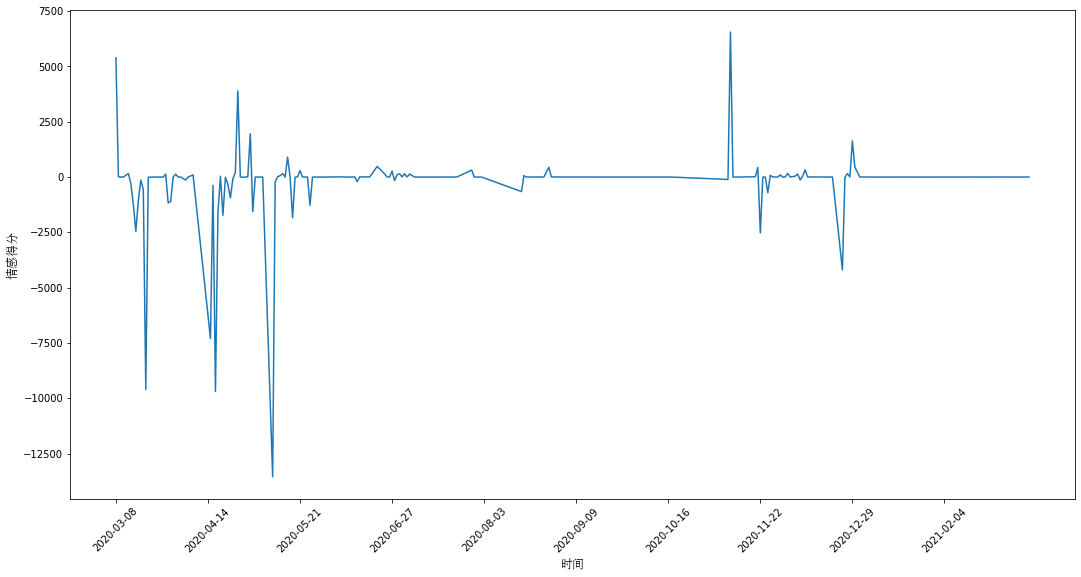

In [23]:
fig = plt.figure(figsize=(18,9))
#生成axis对象
ax = fig.add_subplot(111) #本案例的figure中只包含一个图表
#设置x轴为时间格式，这句非常重要，否则x轴显示的将是类似于‘736268’这样的转码后的数字格式
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))

plt.xticks(pd.date_range(motion_date_data.index[0],motion_date_data.index[-1],freq='D'),rotation=45)

ax.plot(motion_date_data.index,motion_date_data['情感得分'])

plt.xlabel("时间",fontproperties=font_set)#x轴上的名字
plt.ylabel("情感得分",fontproperties=font_set)
plt.locator_params(axis='x', nbins=10)
plt.show()

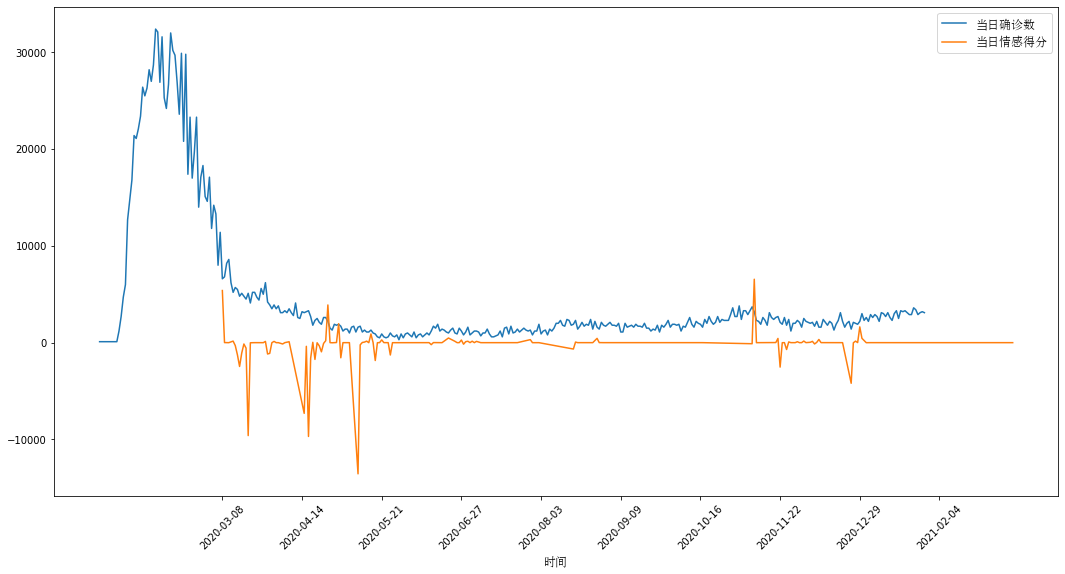

In [72]:
#全国舆论情感与时间图联立

fig = plt.figure(figsize=(18,9))
#生成axis对象
ax = fig.add_subplot(111) #本案例的figure中只包含一个图表

#设置x轴为时间格式
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(date_data.index[0],date_data.index[-1],freq='D'),rotation=45)

ax.plot(date_data.index,date_data['新增确诊']*100,label='当日确诊数')
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(motion_date_data.index[0],motion_date_data.index[-1],freq='D'),rotation=45)
ax.plot(motion_date_data.index,motion_date_data['情感得分'],label='当日情感得分')
plt.locator_params(axis='x', nbins=10)

plt.legend(prop=font_set)
plt.xlabel("时间",fontproperties=font_set)#x轴上的名字
plt.show()

In [31]:
sc_data = pd.read_csv("肺炎清洗数据（四川）.csv")
sc_data = sc_data.fillna(0)
sc_data

,时间,地区,新增确诊
0,2020/1/20,四川,0.0
1,2020/1/21,四川,1.0
2,2020/1/22,四川,1.0
3,2020/1/22,四川,1.0
4,2020/1/22,四川,2.0
...,...,...,...
840,2021/1/20,四川,1.0
841,2021/1/23,四川,1.0
842,2021/1/26,四川,0.0
843,2021/1/27,四川,1.0


In [32]:
for i in range(len(sc_data)):
    sc_data['时间'][i] = datetime.datetime.strptime(sc_data['时间'][i], "%Y/%m/%d")
sc_data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,时间,地区,新增确诊
0,2020-01-20 00:00:00,四川,0.0
1,2020-01-21 00:00:00,四川,1.0
2,2020-01-22 00:00:00,四川,1.0
3,2020-01-22 00:00:00,四川,1.0
4,2020-01-22 00:00:00,四川,2.0
...,...,...,...
840,2021-01-20 00:00:00,四川,1.0
841,2021-01-23 00:00:00,四川,1.0
842,2021-01-26 00:00:00,四川,0.0
843,2021-01-27 00:00:00,四川,1.0


In [33]:
sc_date_data = pd.pivot_table(sc_data,index=['时间'],values=['新增确诊'],aggfunc='count')
print(sc_date_data)

            新增确诊
时间              
2020-01-20     1
2020-01-21     1
2020-01-22     3
2020-01-23     2
2020-01-24     5
...          ...
2021-01-20     2
2021-01-23     1
2021-01-26     1
2021-01-27     1
2021-01-28     1

[277 rows x 1 columns]


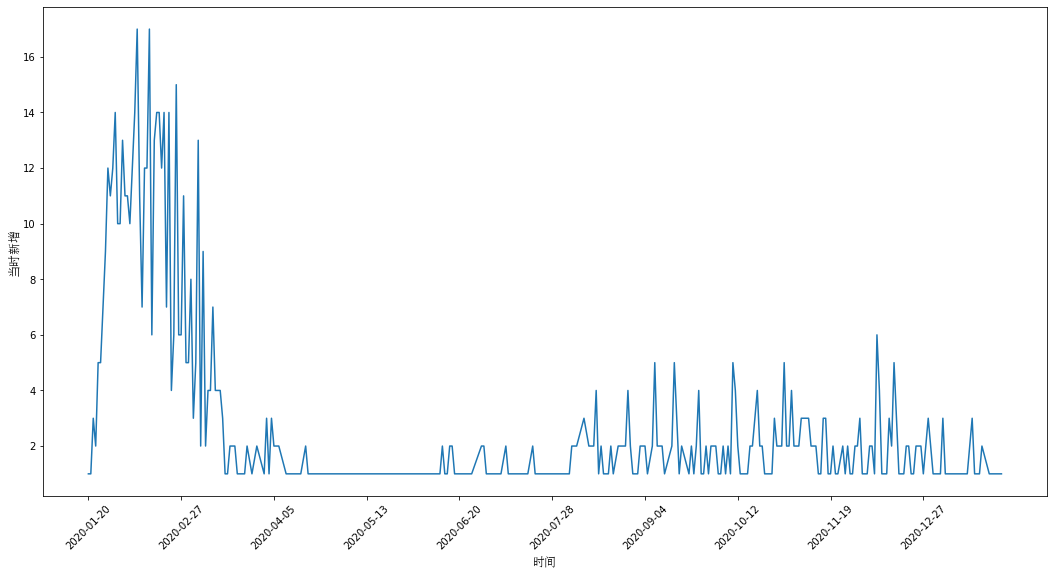

In [34]:
fig = plt.figure(figsize=(18,9))
#生成axis对象
ax = fig.add_subplot(111) #本案例的figure中只包含一个图表

#设置x轴为时间格式
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(sc_date_data.index[0],sc_date_data.index[-1],freq='D'),rotation=45)

ax.plot(sc_date_data.index,sc_date_data['新增确诊'])

plt.xlabel("时间",fontproperties=font_set)#x轴上的名字
plt.ylabel("当时新增",fontproperties=font_set)
plt.locator_params(axis='x', nbins=10)
plt.show()

In [64]:
sc_motion = pd.read_csv("最终数据（四川）.csv")
for i in range(len(sc_motion)):
    sc_motion['时间'][i] = datetime.datetime.strptime(sc_motion['时间'][i], "%Y/%m/%d")
    sc_motion['消极数据'][i] = -sc_motion['消极数据'][i]
sc_motion['情感指数'] = sc_motion['积极数据']+sc_motion['消极数据']
sc_motion['点赞数'] = sc_motion['点赞数']+1
sc_motion['情感得分'] = sc_motion['情感指数']
sc_motion

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,人名,点赞数,时间,地区,积极数据,消极数据,情感指数,情感得分
0,现定的随缘ing,3,2020-12-31 00:00:00,四川,0.969451,-0.030549,0.938901,0.938901
1,梓涵一,2,2020-12-31 00:00:00,四川,0.103428,-0.896572,-0.793144,-0.793144
2,努力啊昊天,1,2020-12-31 00:00:00,四川,0.969451,-0.030549,0.938901,0.938901
3,一个无聊的皮皮虾,1,2020-12-31 00:00:00,四川,0.612186,-0.387814,0.224372,0.224372
4,Derryman,1,2020-12-31 00:00:00,四川,0.710020,-0.289980,0.420041,0.420041
...,...,...,...,...,...,...,...,...
782,李大乐LIDALE,1,2020-03-08 00:00:00,四川,0.392056,-0.607944,-0.215887,-0.215887
783,川海洲,1,2020-03-08 00:00:00,四川,0.097441,-0.902559,-0.805117,-0.805117
784,yoyokkjj,1,2020-03-08 00:00:00,四川,0.612186,-0.387814,0.224372,0.224372
785,蕾蕾很想有人爱,1,2020-03-08 00:00:00,四川,0.992706,-0.007294,0.985412,0.985412


In [65]:
sc_motion_date_data = pd.pivot_table(sc_motion,index=['时间'],values=['情感得分'],aggfunc='sum')
print(sc_motion_date_data)


                情感得分
时间                  
2020-03-08  6.795940
2020-03-09  0.998092
2020-03-13 -1.781408
2020-03-14  2.707345
2020-03-15  0.472072
...              ...
2020-12-27  5.090758
2020-12-29  4.946323
2020-12-30  8.994514
2020-12-31  8.029447
2021-01-02 -0.129429

[81 rows x 1 columns]


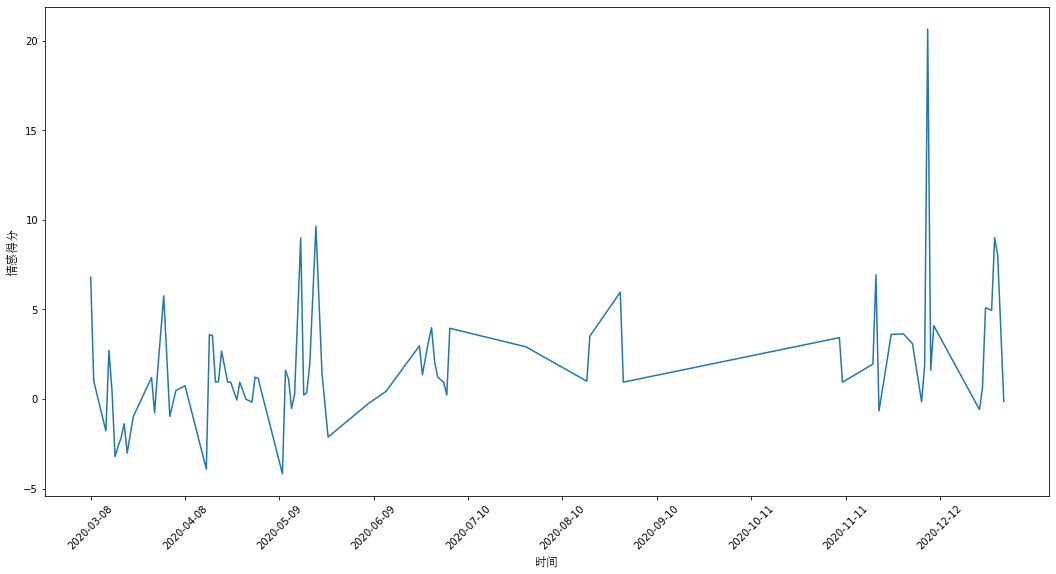

In [66]:
fig = plt.figure(figsize=(18,9))
#生成axis对象
ax = fig.add_subplot(111) #本案例的figure中只包含一个图表
#设置x轴为时间格式，这句非常重要，否则x轴显示的将是类似于‘736268’这样的转码后的数字格式
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))

plt.xticks(pd.date_range(sc_motion_date_data.index[0],sc_motion_date_data.index[-1],freq='D'),rotation=45)

ax.plot(sc_motion_date_data.index,sc_motion_date_data['情感得分'])

plt.xlabel("时间",fontproperties=font_set)#x轴上的名字
plt.ylabel("情感得分",fontproperties=font_set)
plt.locator_params(axis='x', nbins=10)
plt.show()

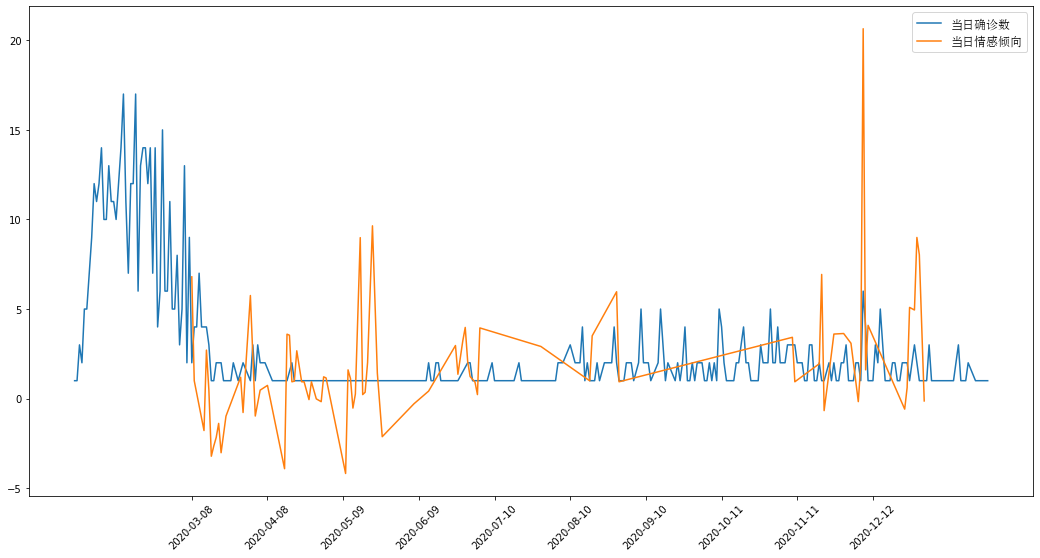

In [73]:
fig = plt.figure(figsize=(18,9))
#生成axis对象
ax = fig.add_subplot(111) #本案例的figure中只包含一个图表

#设置x轴为时间格式
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(sc_date_data.index[0],sc_date_data.index[-1],freq='D'),rotation=45)

ax.plot(sc_date_data.index,sc_date_data['新增确诊'],label='当日确诊数')
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))

plt.xticks(pd.date_range(sc_motion_date_data.index[0],sc_motion_date_data.index[-1],freq='D'),rotation=45)
ax.plot(sc_motion_date_data.index,sc_motion_date_data['情感得分'],label='当日情感倾向')

plt.legend(prop=font_set)
plt.locator_params(axis='x', nbins=10)

plt.show()